2024-08-03 03:08:45.224031: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 03:08:45.377829: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 03:08:45.541556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 03:08:45.675349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 03:08:45.710885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 03:08:45.961525: I tensorflow/core/platform/cpu_feature_gu

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7957)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       795,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,552 (3.06 MB)

 Trainable params: 801,252 (3.06 MB)

 Non-trainable params: 300 (1.17 KB)

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4684 - loss: 3.1771 - val_accuracy: 0.7955 - val_loss: 1.7176 - learning_rate: 0.0010
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6218 - loss: 1.6730 - val_accuracy: 0.7955 - val_loss: 1.5431 - learning_rate: 0.0010
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6312 - loss: 1.5343 - val_accuracy: 0.7955 - val_loss: 1.4756 - learning_rate: 0.0010
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7373 - loss: 1.3625 - val_accuracy: 0.7955 - val_loss: 1.4163 - learning_rate: 0.0010
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7840 - loss: 1.2875 - val_accuracy: 0.7955 - val_loss: 1.3686 - learning_rate: 0.0010
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7498 - loss: 1.2175 - val_accuracy: 0.7955 - val_loss: 1.3240 - learning_rate: 0.0010
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8285 - loss: 1.1230 - val_accu

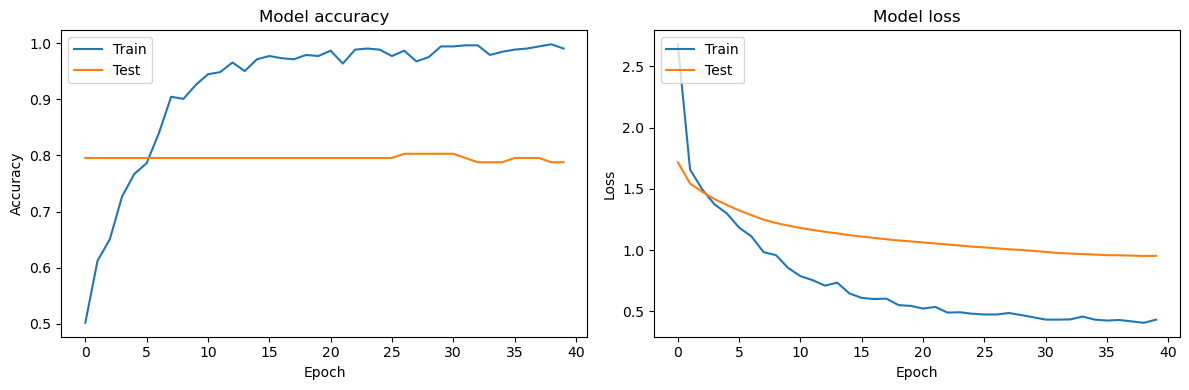

In [2]:
import pandas as pd
df = pd.read_csv('../data_preprocessing_clean.csv')

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['stemmed_text']).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Pembagian data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menghitung class weights untuk menangani imbalance data
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['label']), y=df['label'])
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Ukuran vocab dari TF-IDF dan panjang maksimal input
vocab_size = X.shape[1]
embedding_dim = 128

# Number of classes
num_classes = len(np.unique(y))

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Masukkan dan lapisan pertama dengan regularisasi L2
inputs = layers.Input(shape=(vocab_size,))
x = layers.Dense(100, kernel_regularizer=regularizers.l2(0.01))(inputs)  # Adjusted units and regularizer
x = layers.LeakyReLU(alpha=0.01)(x)
x = layers.Dropout(0.5)(x)  # Adjusted dropout rate
x = layers.BatchNormalization()(x)  # Adding Batch Normalization

# Lapisan kedua
x = layers.Dense(50, kernel_regularizer=regularizers.l2(0.01))(x)  # Adjusted units and regularizer
x = layers.LeakyReLU(alpha=0.01)(x)
x = layers.Dropout(0.5)(x)  # Adjusted dropout rate
x = layers.BatchNormalization()(x)  # Adding Batch Normalization
# Lapisan keluaran
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Mengompilasi model
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
              metrics=['accuracy'])

# Callback untuk Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Summary model
model.summary()

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return (lr * tf.math.exp(-0.1)).numpy().item()
    
lr_scheduler = LearningRateScheduler(scheduler)

# Include this callback in your model training
history = model.fit(
    X_train, y_train, 
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test), 
    class_weight=class_weights, 
    callbacks=[early_stopping, lr_scheduler]
)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

2024-08-03 04:36:20.222360: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 04:36:20.226280: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 04:36:20.239774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 04:36:20.259324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 04:36:20.267005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 04:36:20.284503: I tensorflow/core/platform/cpu_feature_gu

Training fold 1...
Epoch 1/40


I0000 00:00:1722634583.668362  136239 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 04:36:23.669196: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/ubuntu/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - auc: 0.5806 - loss: 3.6088 - val_auc: 0.8228 - val_loss: 1.9336 - learning_rate: 0.0010
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7189 - loss: 1.8237 - val_auc: 0.9846 - val_loss: 1.7948 - learning_rate: 0.0010
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8301 - loss: 1.5503 - val_auc: 0.9889 - val_loss: 1.6988 - learning_rate: 0.0010
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8921 - loss: 1.3424 - val_auc: 0.9893 - val_loss: 1.5913 - learning_rate: 0.0010
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.9468 - loss: 1.1417 - val_auc: 0.9844 - val_loss: 1.4881 - learning_rate: 0.0010
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.9752 - loss: 0.9516 - val_auc: 0.9922 - val_loss: 1.3909 - learning_rate: 0.0010
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.9757 - loss: 0.8350 - val_auc: 0.9884 - val_loss: 1.3070 - learning_rate: 0.0010
Epoch 8/40
27/27 ━━━━━━━━━━━━━

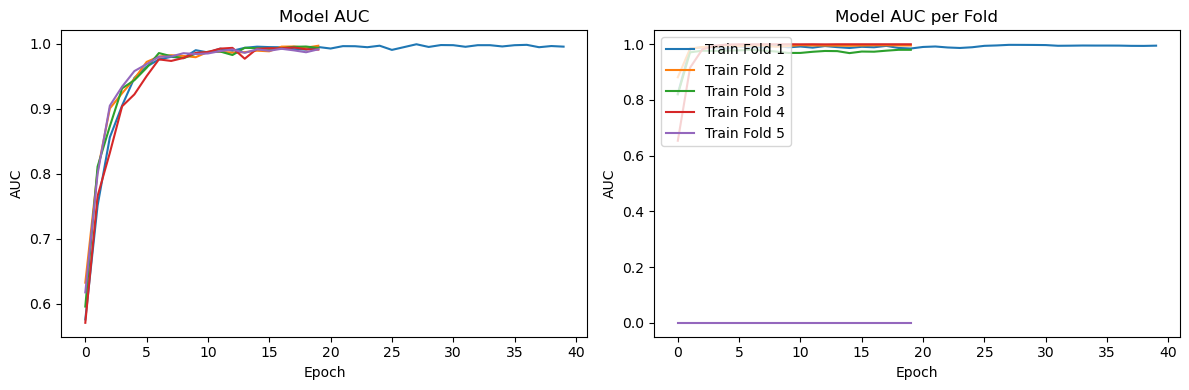

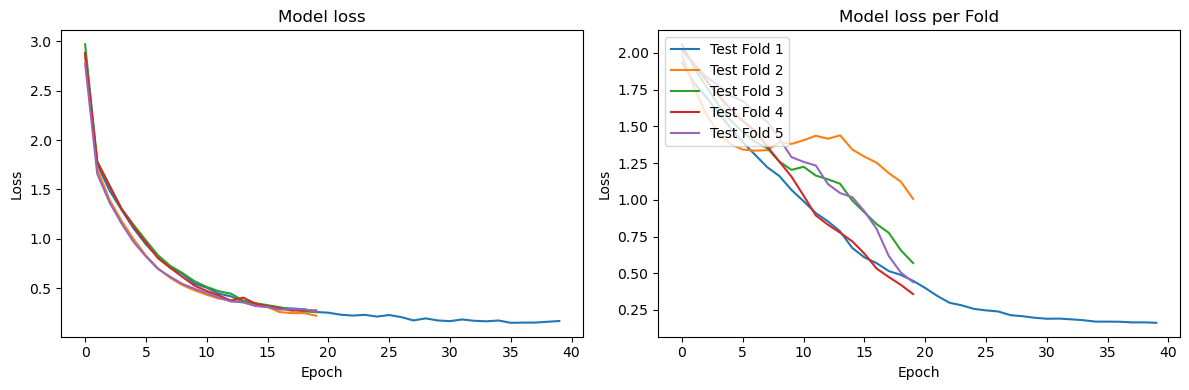

In [1]:
import pandas as pd
df = pd.read_csv('../data_preprocessing_clean.csv')

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Menggunakan SMOTE untuk oversampling kelas minoritas
from imblearn.over_sampling import SMOTE

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['stemmed_text']).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Oversampling kelas minoritas
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menghitung class weights untuk menangani imbalance data
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Ukuran vocab dari TF-IDF dan panjang maksimal input
vocab_size = X.shape[1]

def create_model(vocab_size):
    inputs = layers.Input(shape=(vocab_size,))
    x = layers.Dense(32, kernel_regularizer=regularizers.l2(0.05))(inputs)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(16, kernel_regularizer=regularizers.l2(0.05))(x)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=0.001),
                  metrics=['auc'])
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return (lr * tf.math.exp(-0.1)).numpy().item()

lr_scheduler = LearningRateScheduler(scheduler)

# Callback untuk Early Stopping dengan patience yang lebih tinggi
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Cross-validation setup
kf = KFold(n_splits=5)
fold_no = 1
histories = []

for train_index, test_index in kf.split(X_resampled):
    print(f"Training fold {fold_no}...")
    
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    model = create_model(vocab_size)
    
    history = model.fit(
        X_train, y_train,
        epochs=40,
        batch_size=32,
        validation_data=(X_test, y_test),
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler]
    )
    
    histories.append(history)
    fold_no += 1

import matplotlib.pyplot as plt

# Plot training & validation AUC values
plt.figure(figsize=(12, 4))
for i, history in enumerate(histories):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['auc'])
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_auc'])
    plt.title('Model AUC per Fold')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')

plt.legend([f'Train Fold {i+1}' for i in range(len(histories))], loc='upper left')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for i, history in enumerate(histories):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_loss'])
    plt.title('Model loss per Fold')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

plt.legend([f'Test Fold {i+1}' for i in range(len(histories))], loc='upper left')

plt.tight_layout()
plt.show()

2024-08-03 04:37:33.903201: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 04:37:33.907530: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 04:37:33.919449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 04:37:33.938683: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 04:37:33.943942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 04:37:33.958478: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/40


I0000 00:00:1722634657.121653  141616 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 04:37:37.122189: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/ubuntu/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - auc: 0.5219 - loss: 3.7387 - val_auc: 0.7207 - val_loss: 1.9757 - learning_rate: 0.0010
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7986 - loss: 1.7881 - val_auc: 0.9738 - val_loss: 1.8053 - learning_rate: 0.0010
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8687 - loss: 1.5378 - val_auc: 0.9906 - val_loss: 1.6529 - learning_rate: 0.0010
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.9558 - loss: 1.2677 - val_auc: 0.9913 - val_loss: 1.5000 - learning_rate: 0.0010
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9569 - loss: 1.0987 - val_auc: 0.9903 - val_loss: 1.3659 - learning_rate: 0.0010
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9751 - loss: 0.9312 - val_auc: 0.9872 - val_loss: 1.2442 - learning_rate: 0.0010
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.9808 - loss: 0.8048 - val_auc: 0.9882 - val_loss: 1.1368 - learning_rate: 0.0010
Epoch 8/40
27/27 ━━━━━━━━━━━━━

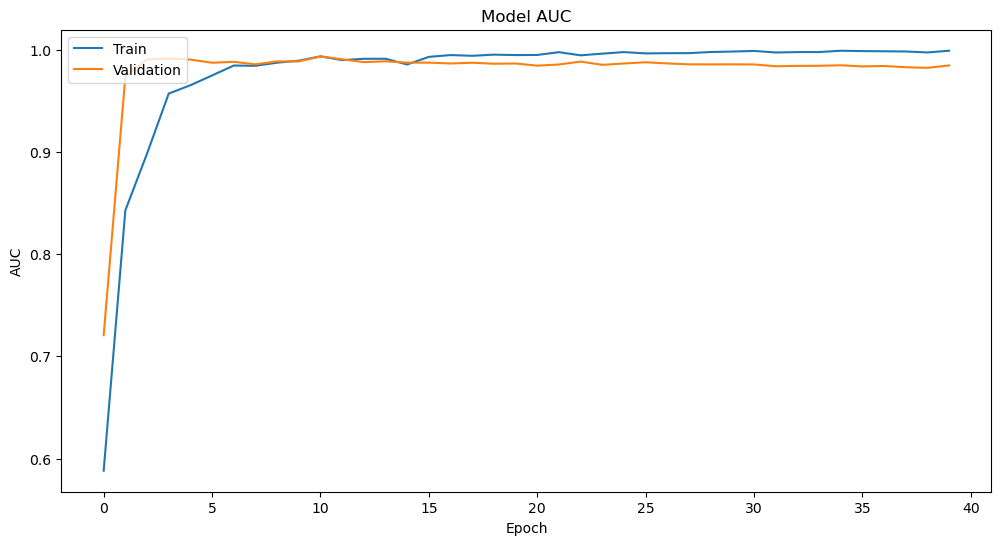

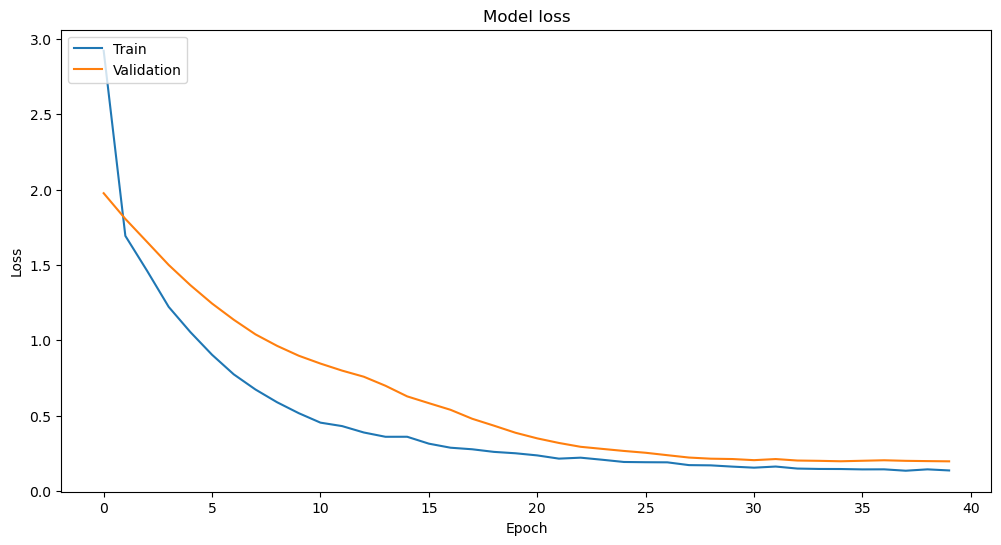

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classification Report for the Model
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       120
           1       0.98      0.93      0.95        94

    accuracy                           0.96       214
   macro avg       0.96      0.95      0.96       214
weighted avg       0.96      0.96      0.96       214



In [1]:
import pandas as pd
df = pd.read_csv('../data_preprocessing_clean.csv')

import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Menggunakan SMOTE untuk oversampling kelas minoritas
from imblearn.over_sampling import SMOTE

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['stemmed_text']).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Oversampling kelas minoritas
smote = SMOTE(random_state=seed)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Pembagian data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=seed)

# Menghitung class weights untuk menangani imbalance data
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Ukuran vocab dari TF-IDF dan panjang maksimal input
vocab_size = X.shape[1]

def create_model(vocab_size):
    inputs = layers.Input(shape=(vocab_size,))
    x = layers.Dense(32, kernel_regularizer=regularizers.l2(0.05))(inputs)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(16, kernel_regularizer=regularizers.l2(0.05))(x)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=0.001),
                  metrics=['auc'])
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return (lr * tf.math.exp(-0.1)).numpy().item()

lr_scheduler = LearningRateScheduler(scheduler)

# Callback untuk Early Stopping dengan patience yang lebih tinggi
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Buat dan latih model
model = create_model(vocab_size)
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)

import matplotlib.pyplot as plt

# Plot training & validation AUC values
plt.figure(figsize=(12, 6))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predicting and generating classification report for the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
report = classification_report(y_test, y_pred)

# Print classification report for the model
print(f"Classification Report for the Model")
print(report)

# # Save the model
# model.save('model.h5')

# # Load and evaluate the model
# loaded_model = tf.keras.models.load_model('model.h5')
# y_pred_loaded = (loaded_model.predict(X_test) > 0.5).astype("int32")
# report_loaded = classification_report(y_test, y_pred_loaded)

# # Print classification report for the loaded model
# print(f"Classification Report for the Loaded Model")
# print(report_loaded)
